In [8]:
import pandas as pd
from sklearn.utils import resample

In [2]:
chunksize = 10**5

data_chunks = pd.read_csv('/Users/neelkalavadiya/File Explorer/ML Project/amex-default-prediction/train_data.csv', chunksize=chunksize)
df_data = pd.concat(data_chunks)

labels_chunks = pd.read_csv('/Users/neelkalavadiya/File Explorer/ML Project/amex-default-prediction/train_labels.csv', chunksize=chunksize)
df_labels = pd.concat(labels_chunks)

In [5]:
df_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [6]:
df_data.shape

(5531451, 190)

In [7]:
df_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [8]:
df_labels.shape

(458913, 2)

In [10]:
april_2018_df = df_data[(df_data['S_2'].dt.month == 4) & (df_data['S_2'].dt.year == 2018)]
april_2018_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145


In [11]:
sample_labels = df_labels.sample(frac=0.2, replace=False, random_state=71)

In [12]:
sample_labels.head()

,customer_ID,target
295056,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1
213729,76ee1d99c169cf7d764e89797b41f0e895ae59dd618852...,0
58931,2104db7776a1cea97c08767c8333f8352505858567092f...,0
227926,7ed4bf78d193a47bcea38a4ce7621b42de5c34587bc4dd...,0
95472,35283aedf900598fd4adc51684ced541c563d3fc696fd5...,1


In [13]:
sample_labels.shape

(91783, 2)


In [14]:
merged_sample_data = pd.merge(sample_labels, df_data, on='customer_ID')

In [15]:
merged_sample_data.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-03-03,0.738781,0.413844,0.608343,0.032103,0.002638,0.136110,0.002402,...,NaN,NaN,NaN,0.005660,0.009437,0.005121,NaN,0.000626,0.005789,0.009930
1,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-04-11,0.736351,0.623450,0.618373,0.031445,0.001824,0.117706,0.008097,...,NaN,NaN,NaN,0.009897,0.006079,0.002417,NaN,0.001138,0.002996,0.004996
2,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-05-09,0.737941,0.563203,0.607572,0.036458,0.004319,0.114859,0.004538,...,NaN,NaN,NaN,0.003856,0.008460,0.001230,NaN,0.007279,0.002502,0.001926
3,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-06-06,0.730354,0.472367,0.619458,0.031486,0.001094,0.121209,0.007695,...,NaN,NaN,NaN,0.004722,0.004081,0.008218,NaN,0.001719,0.008822,0.006513
4,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-07-05,0.749150,0.444102,0.462609,0.315650,0.002511,0.117632,0.007571,...,NaN,NaN,NaN,0.009663,0.008283,0.000696,NaN,0.003741,0.005070,0.002411


In [16]:
merged_sample_data.shape

(1105100, 191)

In [15]:
merged_csv_path = '/Users/neelkalavadiya/File Explorer/ML Project/amex-default-prediction/merged_sample_data.csv'

merged_sample_data.to_csv(merged_csv_path, index=False)



In [31]:
import pandas as pd

df = pd.read_csv('/Users/neelkalavadiya/File Explorer/ML Project/amex-default-prediction/merged_sample_data.csv')

df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-03-03,0.738781,0.413844,0.608343,0.032103,0.002638,0.136110,0.002402,...,NaN,NaN,NaN,0.005660,0.009437,0.005121,NaN,0.000626,0.005789,0.009930
1,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-04-11,0.736351,0.623450,0.618373,0.031445,0.001824,0.117706,0.008097,...,NaN,NaN,NaN,0.009897,0.006079,0.002417,NaN,0.001138,0.002996,0.004996
2,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-05-09,0.737941,0.563203,0.607572,0.036458,0.004319,0.114859,0.004538,...,NaN,NaN,NaN,0.003856,0.008460,0.001230,NaN,0.007279,0.002502,0.001926
3,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-06-06,0.730354,0.472367,0.619458,0.031486,0.001094,0.121209,0.007695,...,NaN,NaN,NaN,0.004722,0.004081,0.008218,NaN,0.001719,0.008822,0.006513
4,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-07-05,0.749150,0.444102,0.462609,0.315650,0.002511,0.117632,0.007571,...,NaN,NaN,NaN,0.009663,0.008283,0.000696,NaN,0.003741,0.005070,0.002411


In [32]:
df['S_2'] = pd.to_datetime(df['S_2'])

In [33]:
df['S_2'] = pd.to_datetime(df['S_2'])

categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# One-hot encoding of the selected columns
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)

one_hot_encoded_df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-03-03,0.738781,0.413844,0.608343,0.032103,0.002638,0.136110,0.002402,...,False,False,False,False,False,False,False,False,False,True
1,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-04-11,0.736351,0.623450,0.618373,0.031445,0.001824,0.117706,0.008097,...,False,False,False,False,False,False,False,False,False,True
2,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-05-09,0.737941,0.563203,0.607572,0.036458,0.004319,0.114859,0.004538,...,False,False,False,False,False,False,False,False,False,True
3,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-06-06,0.730354,0.472367,0.619458,0.031486,0.001094,0.121209,0.007695,...,False,False,False,False,False,False,False,False,False,True
4,a4491ed0abd80958025791e4c1f27701e03722d7ac6d3b...,1,2017-07-05,0.749150,0.444102,0.462609,0.315650,0.002511,0.117632,0.007571,...,False,False,False,False,False,False,False,False,False,True


In [34]:
features = one_hot_encoded_df.drop(['S_2','target','customer_ID'], axis=1).columns.to_list()
# cat_col = [i for i in features if i.startswith('B_30')or i.startswith('B_38') or i.startswith('D_114') or i.startswith('D_116')or i.startswith('D_117') or i.startswith('D_120') or i.startswith('D_126') or i.startswith('D_63')or i.startswith('D_64')or i.startswith('D_66') or i.startswith('D_68')]

# Target Columns
target_columns = ['customer_ID', 'target']

# Categorical Columns:
one_hot_encoded_col = []
for ftr in features:
    for column in categorical_columns:
        if ftr.startswith(column):
            one_hot_encoded_col.append(ftr)
            one_hot_encoded_df[ftr] = one_hot_encoded_df[ftr].astype(int)
    

# Numerical Columns:
numerical_columns = []
for ftr in features:
    if ftr not in one_hot_encoded_col:
        numerical_columns.append(ftr)
        
print(len(one_hot_encoded_col))
print(len(numerical_columns))


45
177


In [35]:
one_hot_encoded_df.sort_values(by=['customer_ID', 'S_2'], inplace=True)

grouped_by_customerID = one_hot_encoded_df.groupby('customer_ID')
grouped_by_customerID.size()

customer_ID
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4    13
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6    13
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36    13
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4    13
000333075fb8ec6d504539852eeeb762643562e701ac79b2101ab0f9471eeb5a    13
                                                                    ..
fffe0f90c85547c9a30d49afdc0f501523e55eec15399d0f298b3892d819821a    13
fffe13e28dc3ceadf28249b596ba25df93e38ec53d38cf28ee13d50d4b7b1a22     3
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88     8
fffef3305f19a11fb6c15f4ebe9be1bd664540e57c0a6aa2ed6a31c31c8069f8    13
ffff39cc22a375d07369980d02d617883dd28ad81a6aa36d506127604c66301c    13
Length: 91783, dtype: int64

In [26]:
# Aggregation For all the numerical columns

def calculate_numerical_statistics(df, time_period):
    last_date = df['S_2'].max()
    time_period_ago = last_date - pd.DateOffset(months=time_period)

    data_last_time_period = df[(df['S_2'] > time_period_ago) & (df['S_2'] <= last_date)]

    average_spend_last_time_period = data_last_time_period.groupby('customer_ID')[numerical_columns].agg(['mean', 'min', 'max', 'sum'])
    average_spend_last_time_period.columns = [f'{col}_{agg}_{time_period}' for col, agg in average_spend_last_time_period.columns]

    return average_spend_last_time_period


# Calculate statistics for different time periods
average_spend_3_months = calculate_numerical_statistics(one_hot_encoded_df, 3)
average_spend_6_months = calculate_numerical_statistics(one_hot_encoded_df, 6)
average_spend_9_months = calculate_numerical_statistics(one_hot_encoded_df, 9)
average_spend_12_months = calculate_numerical_statistics(one_hot_encoded_df, 12)

final_numerical_df = pd.merge(average_spend_3_months, average_spend_6_months, on='customer_ID', how='inner')
final_numerical_df = pd.merge(final_numerical_df, average_spend_9_months, on='customer_ID', how='inner')
final_numerical_df = pd.merge(final_numerical_df, average_spend_12_months, on='customer_ID', how='inner')

final_numerical_df.head()


,P_2_mean_3,P_2_min_3,P_2_max_3,P_2_sum_3,D_39_mean_3,D_39_min_3,D_39_max_3,D_39_sum_3,B_1_mean_3,B_1_min_3,...,D_143_max_12,D_143_sum_12,D_144_mean_12,D_144_min_12,D_144_max_12,D_144_sum_12,D_145_mean_12,D_145_min_12,D_145_max_12,D_145_sum_12
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.447801,0.414444,0.477116,1.343404,0.014288,0.000467,0.035885,0.042865,0.069795,0.009413,...,0.009790,0.056632,0.005769,0.001686,0.009770,0.069230,0.005499,0.001265,0.009131,0.065984
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,0.383134,0.359892,0.402733,1.149401,0.008822,0.006868,0.009807,0.026465,0.055573,0.019576,...,0.006857,0.047314,0.005955,0.000322,0.009932,0.071456,0.005694,0.000503,0.009974,0.068326
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,0.999192,0.989678,1.004771,2.997577,0.143011,0.005387,0.414372,0.429034,0.005920,0.003655,...,0.008199,0.038327,0.004665,0.001137,0.008543,0.055977,0.004310,0.001412,0.008142,0.051715
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,0.577358,0.530980,0.606293,1.732075,1.456952,0.242640,2.563565,4.370856,0.419347,0.392713,...,0.009807,0.045504,0.004495,0.000307,0.009862,0.053946,0.005171,0.001018,0.009560,0.062058
000333075fb8ec6d504539852eeeb762643562e701ac79b2101ab0f9471eeb5a,0.704148,0.699399,0.709686,2.112445,0.086170,0.006179,0.244676,0.258510,0.030300,0.021920,...,0.009351,0.064178,0.006211,0.001271,0.009545,0.074537,0.005802,0.000903,0.009744,0.069618


In [32]:
# Aggregation For all the categorical columns

def calculate_categorical_statistics(df, time_period, one_hot_encoded_col):
    last_date = df['S_2'].max()
    time_period_ago = last_date - pd.DateOffset(months=time_period)

    data_last_time_period = df[(df['S_2'] > time_period_ago) & (df['S_2'] <= last_date)]
    
    grouped_positive_response_rates = data_last_time_period.groupby('customer_ID')[one_hot_encoded_col].mean()
    grouped_positive_response_rates.columns = [f'{col}_response_rate_{time_period}' for col in grouped_positive_response_rates.columns]
    
    grouped_ever_responded = data_last_time_period.groupby('customer_ID')[one_hot_encoded_col].any().astype(int)
    grouped_ever_responded.columns = [f'{col}_ever_respond_{time_period}' for col in grouped_ever_responded.columns]
    
    merged_df = pd.merge(grouped_positive_response_rates,grouped_ever_responded, on='customer_ID', how='inner')
    
    return merged_df

cat_stats_3_months = calculate_categorical_statistics(one_hot_encoded_df, 3, one_hot_encoded_col)
cat_stats_6_months = calculate_categorical_statistics(one_hot_encoded_df, 6, one_hot_encoded_col)
cat_stats_9_months = calculate_categorical_statistics(one_hot_encoded_df, 9, one_hot_encoded_col)
cat_stats_12_months = calculate_categorical_statistics(one_hot_encoded_df, 12, one_hot_encoded_col)

final_categorical_df = pd.merge(cat_stats_3_months, cat_stats_6_months, on='customer_ID', how='inner')
final_categorical_df = pd.merge(final_categorical_df, cat_stats_9_months, on='customer_ID', how='inner')
final_categorical_df = pd.merge(final_categorical_df, cat_stats_12_months, on='customer_ID', how='inner')

final_categorical_df.head()

,B_30_0.0_response_rate_3,B_30_1.0_response_rate_3,B_30_2.0_response_rate_3,B_38_1.0_response_rate_3,B_38_2.0_response_rate_3,B_38_3.0_response_rate_3,B_38_4.0_response_rate_3,B_38_5.0_response_rate_3,B_38_6.0_response_rate_3,B_38_7.0_response_rate_3,...,D_64_U_ever_respond_12,D_66_0.0_ever_respond_12,D_66_1.0_ever_respond_12,D_68_0.0_ever_respond_12,D_68_1.0_ever_respond_12,D_68_2.0_ever_respond_12,D_68_3.0_ever_respond_12,D_68_4.0_ever_respond_12,D_68_5.0_ever_respond_12,D_68_6.0_ever_respond_12
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.666667,0.333333,0.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
000333075fb8ec6d504539852eeeb762643562e701ac79b2101ab0f9471eeb5a,1.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [183]:
grouped = one_hot_encoded_df.groupby('customer_ID')
grouped_sizes = grouped.size()

group_12 = grouped_sizes[grouped_sizes == 12]

In [179]:
one_hot_encoded_df[one_hot_encoded_df]

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
251593,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,...,0,0,0,0,0,0,0,0,0,0
251594,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,...,0,0,0,0,0,0,0,0,0,0
251595,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,...,0,0,0,0,0,1,0,0,0,0
251596,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,...,0,0,0,0,0,1,0,0,0,0
251597,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218818,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2017-11-09,0.783434,0.033319,0.323389,0.075680,0.007958,0.169792,0.005828,...,1,0,0,0,0,0,0,0,1,0
218819,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2017-12-09,0.797892,0.038525,0.355785,0.029669,0.001361,0.163341,0.009937,...,1,0,0,0,0,0,0,0,1,0
218820,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2018-01-10,0.794549,0.032799,0.032217,1.003819,0.009614,0.165924,0.002584,...,1,0,0,0,0,0,0,0,1,0
218821,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2018-02-13,0.794033,0.215072,0.042467,0.123928,0.006220,0.165162,0.002593,...,1,0,0,0,0,0,0,0,1,0


In [33]:
grouped_by_customerID = one_hot_encoded_df.groupby('customer_ID').agg({'target': 'mean'})
grouped_by_customerID

,target
customer_ID,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.0
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.0
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,0.0
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.0
000333075fb8ec6d504539852eeeb762643562e701ac79b2101ab0f9471eeb5a,1.0
...,...
fffe0f90c85547c9a30d49afdc0f501523e55eec15399d0f298b3892d819821a,1.0
fffe13e28dc3ceadf28249b596ba25df93e38ec53d38cf28ee13d50d4b7b1a22,0.0
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88,1.0


In [34]:
final_data = pd.merge(final_numerical_df, final_categorical_df, on='customer_ID', how='inner')
final_data = pd.merge(grouped_by_customerID, final_data, on='customer_ID', how='inner')

final_data.head()

,target,P_2_mean_3,P_2_min_3,P_2_max_3,P_2_sum_3,D_39_mean_3,D_39_min_3,D_39_max_3,D_39_sum_3,B_1_mean_3,...,D_64_U_ever_respond_12,D_66_0.0_ever_respond_12,D_66_1.0_ever_respond_12,D_68_0.0_ever_respond_12,D_68_1.0_ever_respond_12,D_68_2.0_ever_respond_12,D_68_3.0_ever_respond_12,D_68_4.0_ever_respond_12,D_68_5.0_ever_respond_12,D_68_6.0_ever_respond_12
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.0,0.447801,0.414444,0.477116,1.343404,0.014288,0.000467,0.035885,0.042865,0.069795,...,0,0,0,0,0,1,1,0,0,0
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.0,0.383134,0.359892,0.402733,1.149401,0.008822,0.006868,0.009807,0.026465,0.055573,...,0,0,0,0,0,0,0,0,1,0
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,0.0,0.999192,0.989678,1.004771,2.997577,0.143011,0.005387,0.414372,0.429034,0.005920,...,0,0,0,0,0,0,0,0,0,1
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.0,0.577358,0.530980,0.606293,1.732075,1.456952,0.242640,2.563565,4.370856,0.419347,...,1,0,0,0,1,1,0,0,0,0
000333075fb8ec6d504539852eeeb762643562e701ac79b2101ab0f9471eeb5a,1.0,0.704148,0.699399,0.709686,2.112445,0.086170,0.006179,0.244676,0.258510,0.030300,...,0,0,0,0,0,0,0,0,1,0


In [87]:
last_date = one_hot_encoded_df['S_2'].max()
time_period_ago = last_date - pd.DateOffset(months=6)

data_last_time_period = one_hot_encoded_df[(one_hot_encoded_df['S_2'] > time_period_ago) & (one_hot_encoded_df['S_2'] <= last_date)]
data_last_time_period

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
251600,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-10-15,0.560474,0.001538,0.090844,0.046120,0.006817,0.302323,0.006669,...,0,0,0,0,0,1,0,0,0,0
251601,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-11-10,0.407172,0.001548,0.106145,0.048557,0.001353,0.330037,0.009187,...,0,0,0,0,0,1,0,0,0,0
251602,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-12-19,0.412912,0.003498,0.112638,0.057964,0.000030,0.367211,0.006090,...,0,0,0,0,0,0,1,0,0,0
251603,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-01-11,0.414444,0.006512,0.100998,0.055903,0.000040,0.333741,0.007850,...,0,0,0,0,0,0,1,0,0,0
251604,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-02-09,0.451845,0.035885,0.098974,0.040892,0.004703,0.326790,0.003599,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218818,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2017-11-09,0.783434,0.033319,0.323389,0.075680,0.007958,0.169792,0.005828,...,1,0,0,0,0,0,0,0,1,0
218819,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2017-12-09,0.797892,0.038525,0.355785,0.029669,0.001361,0.163341,0.009937,...,1,0,0,0,0,0,0,0,1,0
218820,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2018-01-10,0.794549,0.032799,0.032217,1.003819,0.009614,0.165924,0.002584,...,1,0,0,0,0,0,0,0,1,0
218821,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,0,2018-02-13,0.794033,0.215072,0.042467,0.123928,0.006220,0.165162,0.002593,...,1,0,0,0,0,0,0,0,1,0


In [213]:
print(final_data.shape)

NameError: name 'final_data' is not defined

In [50]:
final_data.to_csv("/Users/neelkalavadiya/File Explorer/ML Project/amex-default-prediction/final_data.csv")


In [165]:
import pandas as pd
final_data_df = pd.read_csv("final_data.csv") 


In [166]:
final_data_df.head()

,customer_ID,target,P_2_mean_3,P_2_min_3,P_2_max_3,P_2_sum_3,D_39_mean_3,D_39_min_3,D_39_max_3,D_39_sum_3,...,D_64_U_ever_respond_12,D_66_0.0_ever_respond_12,D_66_1.0_ever_respond_12,D_68_0.0_ever_respond_12,D_68_1.0_ever_respond_12,D_68_2.0_ever_respond_12,D_68_3.0_ever_respond_12,D_68_4.0_ever_respond_12,D_68_5.0_ever_respond_12,D_68_6.0_ever_respond_12
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.0,0.447801,0.414444,0.477116,1.343404,0.014288,0.000467,0.035885,0.042865,...,0,0,0,0,0,1,1,0,0,0
1,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...,1.0,0.383134,0.359892,0.402733,1.149401,0.008822,0.006868,0.009807,0.026465,...,0,0,0,0,0,0,0,0,1,0
2,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,0.0,0.999192,0.989678,1.004771,2.997577,0.143011,0.005387,0.414372,0.429034,...,0,0,0,0,0,0,0,0,0,1
3,0002e335892f7998f0feb3a59f32d652f0da7c85e535b9...,1.0,0.577358,0.530980,0.606293,1.732075,1.456952,0.242640,2.563565,4.370856,...,1,0,0,0,1,1,0,0,0,0
4,000333075fb8ec6d504539852eeeb762643562e701ac79...,1.0,0.704148,0.699399,0.709686,2.112445,0.086170,0.006179,0.244676,0.258510,...,0,0,0,0,0,0,0,0,1,0


In [167]:
final_data_df.shape

(91783, 3194)

In [170]:
final_data_df['target'].mean()

0.25844655328328775

# Test-Train Split

In [104]:
from sklearn.model_selection import train_test_split

X = final_data_df.drop(['customer_ID', 'target'], axis=1)
Y = final_data_df['target']

X_Train, X_Test_Whole, Y_Train, Y_Test_Whole = train_test_split(X, Y, test_size=0.3, random_state=71)
X_Test1, X_Test2, Y_Test1, Y_Test2  = train_test_split(X_Test_Whole, Y_Test_Whole, test_size=0.5, random_state=71)


In [105]:
print (X_Train.shape)
print (Y_Train.shape)

print (X_Test1.shape)
print (Y_Test1.shape)

print (X_Test2.shape)
print (Y_Test2.shape)

(64248, 3192)
(64248,)
(13767, 3192)
(13767,)
(13768, 3192)
(13768,)


In [106]:
print(Y_Train.mean())
print(Y_Test1.mean())
print(Y_Test2.mean())

0.25856057776117547
0.2605505919953512
0.25581057524694945


In [107]:
X_Train.head()

,P_2_mean_3,P_2_min_3,P_2_max_3,P_2_sum_3,D_39_mean_3,D_39_min_3,D_39_max_3,D_39_sum_3,B_1_mean_3,B_1_min_3,...,D_64_U_ever_respond_12,D_66_0.0_ever_respond_12,D_66_1.0_ever_respond_12,D_68_0.0_ever_respond_12,D_68_1.0_ever_respond_12,D_68_2.0_ever_respond_12,D_68_3.0_ever_respond_12,D_68_4.0_ever_respond_12,D_68_5.0_ever_respond_12,D_68_6.0_ever_respond_12
57350,0.587730,0.586382,0.588951,1.763189,0.761567,0.151475,1.244471,2.284701,0.045973,0.023055,...,0,0,0,1,0,0,0,0,1,1
36639,0.304744,0.303443,0.306288,0.914231,0.016510,0.003305,0.036915,0.049530,0.635616,0.598154,...,0,0,0,0,0,0,0,0,1,0
57906,0.655790,0.654110,0.657779,1.967369,0.004091,0.000857,0.006341,0.012273,0.005585,0.000907,...,0,0,0,0,0,0,0,0,0,1
46763,0.751620,0.747207,0.755959,2.254859,0.919317,0.038035,1.800976,2.757950,0.570422,0.564436,...,0,0,0,0,0,0,0,0,0,1
77509,0.129712,0.089782,0.153139,0.389137,1.799382,1.063041,2.862419,5.398147,0.027673,0.024722,...,1,0,0,0,1,0,1,0,0,0


In [108]:
Y_Train.head()

57350    0.0
36639    1.0
57906    0.0
46763    1.0
77509    1.0
Name: target, dtype: float64

In [109]:
for ftr in X_Test1.columns:
    if (ftr.startswith('B') and ftr.endswith('6')) or (ftr.startswith('S') and ftr.endswith('6')):
        print(ftr)

B_1_mean_6
B_1_min_6
B_1_max_6
B_1_sum_6
B_2_mean_6
B_2_min_6
B_2_max_6
B_2_sum_6
S_3_mean_6
S_3_min_6
S_3_max_6
S_3_sum_6
B_3_mean_6
B_3_min_6
B_3_max_6
B_3_sum_6
B_4_mean_6
B_4_min_6
B_4_max_6
B_4_sum_6
B_5_mean_6
B_5_min_6
B_5_max_6
B_5_sum_6
B_6_mean_6
B_6_min_6
B_6_max_6
B_6_sum_6
B_7_mean_6
B_7_min_6
B_7_max_6
B_7_sum_6
B_8_mean_6
B_8_min_6
B_8_max_6
B_8_sum_6
B_9_mean_6
B_9_min_6
B_9_max_6
B_9_sum_6
B_10_mean_6
B_10_min_6
B_10_max_6
B_10_sum_6
S_5_mean_6
S_5_min_6
S_5_max_6
S_5_sum_6
B_11_mean_6
B_11_min_6
B_11_max_6
B_11_sum_6
S_6_mean_6
S_6_min_6
S_6_max_6
S_6_sum_6
S_7_mean_6
S_7_min_6
S_7_max_6
S_7_sum_6
B_12_mean_6
B_12_min_6
B_12_max_6
B_12_sum_6
S_8_mean_6
S_8_min_6
S_8_max_6
S_8_sum_6
B_13_mean_6
B_13_min_6
B_13_max_6
B_13_sum_6
S_9_mean_6
S_9_min_6
S_9_max_6
S_9_sum_6
B_14_mean_6
B_14_min_6
B_14_max_6
B_14_sum_6
B_15_mean_6
B_15_min_6
B_15_max_6
B_15_sum_6
S_11_mean_6
S_11_min_6
S_11_max_6
S_11_sum_6
B_16_mean_6
B_16_min_6
B_16_max_6
B_16_sum_6
B_17_mean_6
B_17_min_6
B_

In [111]:
strategyBalSpenData_Train = X_Train[['B_1_mean_6','S_3_mean_6']]
strategyBalSpenData_Test1 = X_Test1[['B_1_mean_6','S_3_mean_6']]
strategyBalSpenData_Test2 = X_Test2[['B_1_mean_6','S_3_mean_6']]



# Feature Engineering

In [9]:
import xgboost as xgb

feature_importance_model_1 = xgb.XGBClassifier()
feature_importance_model_1.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
feature_importance_1 = {'Feature':X_Train.columns,'Importance':feature_importance_model_1.feature_importances_}
feature_importance_1 = pd.DataFrame(feature_importance_1)

feature_importance_1.sort_values("Importance", inplace=True, ascending=False)
feature_importance_1.to_csv("imp_features_1.csv")

feature_importance_1


,Feature,Importance
0,P_2_mean_3,0.133275
11,B_1_sum_3,0.056550
16,R_1_mean_3,0.016157
13,B_2_min_3,0.012895
9,B_1_min_3,0.009130
...,...,...
1688,D_73_mean_9,0.000000
1687,B_23_sum_9,0.000000
1683,S_15_sum_9,0.000000
1682,S_15_max_9,0.000000


In [13]:
imp_features_1 = feature_importance_1['Feature'][feature_importance_1['Importance'] > 0.005]
imp_features_1


0         P_2_mean_3
11         B_1_sum_3
16        R_1_mean_3
13         B_2_min_3
9          B_1_min_3
1          P_2_min_3
124      B_11_mean_3
8         B_1_mean_3
40       D_44_mean_3
2156    D_42_mean_12
2174     D_45_max_12
Name: Feature, dtype: object

In [14]:
feature_importance_model_2 = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5, random_state=71)
feature_importance_model_2.fit(X_Train, Y_Train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=71, ...)

In [15]:
feature_importance_2 = {'Feature':X_Train.columns,'Importance':feature_importance_model_2.feature_importances_}
feature_importance_2 = pd.DataFrame(feature_importance_2)

feature_importance_2.sort_values("Importance", inplace=True,ascending=False)
feature_importance_2.to_csv("imp_features_2.csv")

feature_importance_2

,Feature,Importance
708,P_2_mean_6,0.112050
1,P_2_min_3,0.018596
709,P_2_min_6,0.017223
11,B_1_sum_3,0.012221
0,P_2_mean_3,0.011233
...,...,...
1691,D_73_sum_9,0.000000
1690,D_73_max_9,0.000000
1689,D_73_min_9,0.000000
1688,D_73_mean_9,0.000000


In [16]:
imp_features_2 = feature_importance_2['Feature'][feature_importance_2['Importance'] > 0.005]
imp_features_2


708    P_2_mean_6
1       P_2_min_3
709     P_2_min_6
11      B_1_sum_3
0      P_2_mean_3
3       P_2_sum_3
98      B_9_max_3
19      R_1_sum_3
Name: Feature, dtype: object

In [17]:
final_features = pd.concat([imp_features_1, imp_features_2]).unique()
final_features


array(['P_2_mean_3', 'B_1_sum_3', 'R_1_mean_3', 'B_2_min_3', 'B_1_min_3',
       'P_2_min_3', 'B_11_mean_3', 'B_1_mean_3', 'D_44_mean_3',
       'D_42_mean_12', 'D_45_max_12', 'P_2_mean_6', 'P_2_min_6',
       'P_2_sum_3', 'B_9_max_3', 'R_1_sum_3'], dtype=object)

In [115]:
imp_features_1 = pd.read_csv("imp_features_1.csv")
imp_features_1 = imp_features_1['Feature'][imp_features_1['Importance'] > 0.005]

imp_features_2 = pd.read_csv("imp_features_2.csv")
imp_features_2 = imp_features_2['Feature'][imp_features_2['Importance'] > 0.005]

final_features = pd.concat([imp_features_1, imp_features_2]).unique()
final_features

array(['P_2_mean_3', 'B_1_sum_3', 'R_1_mean_3', 'B_2_min_3', 'B_1_min_3',
       'P_2_min_3', 'B_11_mean_3', 'B_1_mean_3', 'D_44_mean_3',
       'D_42_mean_12', 'D_45_max_12', 'P_2_mean_6', 'P_2_min_6',
       'P_2_sum_3', 'B_9_max_3', 'R_1_sum_3'], dtype=object)

In [116]:
X_Train = X_Train[final_features]
X_Test1 = X_Test1[final_features]
X_Test2 = X_Test2[final_features]

In [19]:
X_Test2

,P_2_mean_3,B_1_sum_3,R_1_mean_3,B_2_min_3,B_1_min_3,P_2_min_3,B_11_mean_3,B_1_mean_3,D_44_mean_3,D_42_mean_12,D_45_max_12,P_2_mean_6,P_2_min_6,P_2_sum_3,B_9_max_3,R_1_sum_3
47472,0.689421,0.152182,0.005069,1.004651,0.020238,0.623570,0.035443,0.050727,0.006192,NaN,0.398375,0.765807,0.623570,2.068262,0.009292,0.015206
74274,0.235814,0.115083,0.174251,1.000331,0.026510,0.231893,0.028149,0.038361,0.338596,NaN,0.335857,0.277740,0.231893,0.707441,0.007046,0.522752
87867,0.081657,3.325508,0.338298,0.011227,1.095680,0.059280,1.093009,1.108503,0.548377,0.562128,0.043032,0.030228,-0.044143,0.244970,0.669997,1.014895
74784,0.923072,0.025590,0.007080,0.812601,0.004417,0.872050,0.006083,0.008530,0.004314,NaN,0.457842,0.919275,0.872050,2.769216,0.009478,0.021241
20801,0.431340,0.774099,0.423275,0.058063,0.249887,0.415883,0.239199,0.258033,0.588520,NaN,1.203350,0.426689,0.415883,1.294019,0.580614,1.269824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59575,0.978165,0.030337,0.004338,0.811155,0.008377,0.922874,0.005681,0.010112,0.005289,NaN,0.125571,0.986850,0.922874,2.934496,0.026082,0.013013
25801,0.608063,0.067885,0.001392,0.810585,0.009668,0.591296,0.013846,0.022628,0.001882,NaN,0.091730,0.614842,0.586526,1.824189,0.005703,0.004177
4461,0.955195,0.014316,0.006841,0.812790,0.003229,0.945884,0.004424,0.004772,0.004592,0.005378,0.042081,0.928613,0.883129,2.865584,0.005286,0.020522
44550,0.518403,0.226231,0.003898,0.148521,0.070189,0.504484,0.072943,0.075410,0.170836,NaN,0.211536,0.509923,0.472570,1.555209,0.007215,0.011694


# XGBoost Model

In [20]:
from sklearn.metrics import roc_auc_score

In [24]:
# Step 11: XGBoost Grid Search
# Grid_Search_Results = pd.DataFrame()
Grid_Search_Results = pd.DataFrame(columns = ["Number of Trees", "Learning Rate (LR)", 'Subsample', 'colsample_bytree', 'scale_pos_weight',"AUC Train", "AUC Test 1", "AUC Test 2"])

Row = 0
for n_trees in [50, 100, 300]:
    for lr in [0.01, 0.1]:
        for subsample in [0.5, 0.8]:
            for colsample in [0.5, 1.0]:
                for weight in [1, 5, 10]:
                    xgb_instance = xgb.XGBClassifier(n_estimators= n_trees, learning_rate = lr,subsample=subsample, colsample_bytree=colsample, scale_pos_weight=weight)                    
                    model = xgb_instance.fit(X_Train, Y_Train)
                    
                    Grid_Search_Results.loc[Row,"Number of Trees"] = n_trees
                    Grid_Search_Results.loc[Row,"Learning Rate (LR)"] = lr
                    Grid_Search_Results.loc[Row,"Subsample"] = subsample
                    Grid_Search_Results.loc[Row,"colsample_bytree"] = colsample
                    Grid_Search_Results.loc[Row,"scale_pos_weight"] = weight
                    
                    Grid_Search_Results.loc[Row,"AUC Train"] = roc_auc_score(Y_Train, model.predict_proba(X_Train)[:,1])
                    Grid_Search_Results.loc[Row,"AUC Test 1"] = roc_auc_score(Y_Test1, model.predict_proba(X_Test1)[:,1])
                    Grid_Search_Results.loc[Row,"AUC Test 2"] = roc_auc_score(Y_Test2, model.predict_proba(X_Test2)[:,1])

                    Row += 1
                    Grid_Search_Results.to_csv("Grid_Search_Results_XGB.csv")

Grid_Search_Results

,Number of Trees,Learning Rate (LR),Subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,0.5,0.5,1,0.944074,0.940503,0.944091
1,50,0.01,0.5,0.5,5,0.942872,0.939835,0.942865
2,50,0.01,0.5,0.5,10,0.942223,0.939143,0.942182
3,50,0.01,0.5,1.0,1,0.944875,0.940824,0.944593
4,50,0.01,0.5,1.0,5,0.943477,0.940019,0.943093
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.971496,0.940609,0.945
68,300,0.1,0.8,0.5,10,0.969651,0.940962,0.94455
69,300,0.1,0.8,1.0,1,0.975172,0.941224,0.944608
70,300,0.1,0.8,1.0,5,0.973693,0.940698,0.943753


In [25]:
# Define the thresholds
train_threshold = 0.90
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in Grid_Search_Results.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row["AUC Train"] - row["AUC Test 1"]), abs(row["AUC Train"] - row["AUC Test 2"]))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row["AUC Train"] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row["AUC Test 1"] + row["AUC Test 2"]) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found")

Number of Trees            100
Learning Rate (LR)         0.1
Subsample                  0.5
colsample_bytree           0.5
scale_pos_weight             1
AUC Train             0.955389
AUC Test 1            0.942988
AUC Test 2            0.946581
Name: 36, dtype: object


In [26]:
final_XGBoost_model = xgb.XGBClassifier(
    n_estimators=best_model['Number of Trees'],
    learning_rate=best_model['Learning Rate (LR)'],
    subsample=best_model['Subsample'],
    colsample_bytree=best_model['colsample_bytree'],
    scale_pos_weight=best_model['scale_pos_weight']
)

# Fit the model on the training data
final_XGBoost_model.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
final_XGBoost_model.save_model('final_XGBoost_model.bin')

/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [08:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


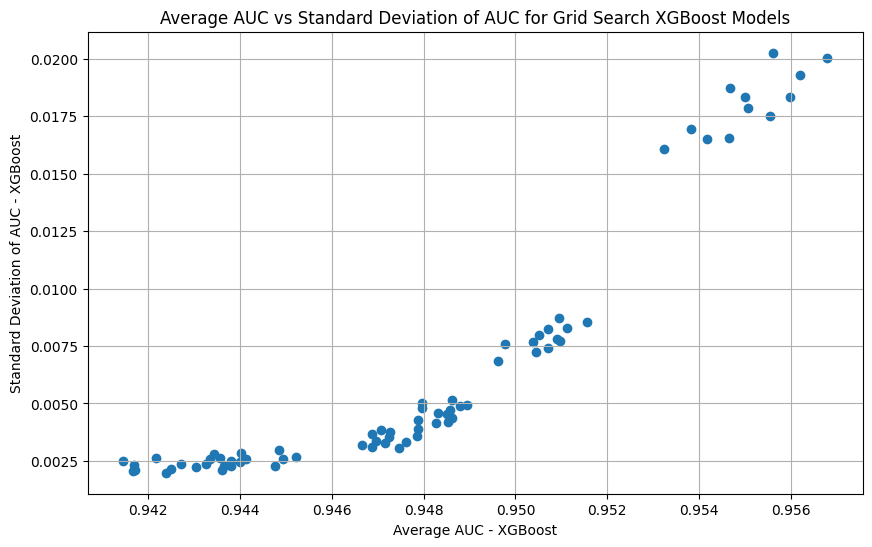

In [158]:
# Calculate average and standard deviation of AUCs

import matplotlib.pyplot as plt

Grid_Search_Results['Average AUC'] = Grid_Search_Results[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
Grid_Search_Results['Standard Deviation AUC'] = Grid_Search_Results[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 6))
plt.scatter(Grid_Search_Results['Average AUC'], Grid_Search_Results['Standard Deviation AUC'])
plt.xlabel('Average AUC - XGBoost')
plt.ylabel('Standard Deviation of AUC - XGBoost')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search XGBoost Models')
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import classification_report

Y_Test1_Pred = final_XGBoost_model.predict(X_Test1)
Y_Test2_Pred = final_XGBoost_model.predict(X_Test2)

Y_Test1_report = classification_report(Y_Test1, Y_Test1_Pred)
Y_Test2_report = classification_report(Y_Test2, Y_Test2_Pred)

print(Y_Test1_report)
print(Y_Test2_report)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     10180
         1.0       0.76      0.77      0.77      3587

    accuracy                           0.88     13767
   macro avg       0.84      0.84      0.84     13767
weighted avg       0.88      0.88      0.88     13767

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     10246
         1.0       0.77      0.78      0.78      3522

    accuracy                           0.89     13768
   macro avg       0.85      0.85      0.85     13768
weighted avg       0.89      0.89      0.89     13768



In [63]:
final_XGBoost_model.load_model('final_XGBoost_model.bin')

In [117]:
Y_Train_PredProb = final_XGBoost_model.predict_proba(X_Train)[:,1]
Y_Test1_PredProb = final_XGBoost_model.predict_proba(X_Test1)[:,1]
Y_Test2_PredProb = final_XGBoost_model.predict_proba(X_Test2)[:,1]

In [118]:
Y_Test1_PredProb
Y_Test2_PredProb
Y_Train_PredProb

array([0.10727248, 0.83687866, 0.01334429, ..., 0.4011338 , 0.30259055,
       0.07550102], dtype=float32)

In [119]:
len(Y_Test1_PredProb)
type(strategyBalSpenData)
len(Y_Test2_PredProb)
len(Y_Train_PredProb)

64248

In [120]:
Y_Train_PredProb_df = pd.DataFrame(Y_Train_PredProb)
Y_Test1_PredProb_df = pd.DataFrame(Y_Test1_PredProb)
Y_Test2_PredProb_df = pd.DataFrame(Y_Test2_PredProb)

Y_Train_PredProb_df

,0
0,0.107272
1,0.836879
2,0.013344
3,0.740994
4,0.694366
...,...
64243,0.067296
64244,0.003531
64245,0.401134
64246,0.302591


In [123]:
strategyBalSpenData_Train.reset_index(drop=True, inplace=True)
strategyBalSpenData_Test1.reset_index(drop=True, inplace=True)
strategyBalSpenData_Test2.reset_index(drop=True, inplace=True)

strategyBalSpenData_Train

,B_1_mean_6,S_3_mean_6
0,0.046704,0.021220
1,0.606087,0.180836
2,0.006068,NaN
3,0.570967,0.240351
4,0.028071,0.318232
...,...,...
64243,0.431134,0.149807
64244,0.094897,0.166599
64245,0.049822,0.252993
64246,0.149262,0.481562


In [124]:
Y_Train.reset_index(drop=True, inplace=True)
Y_Test1.reset_index(drop=True, inplace=True)
Y_Test2.reset_index(drop=True, inplace=True)

Y_Train

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
64243    1.0
64244    0.0
64245    1.0
64246    0.0
64247    0.0
Name: target, Length: 64248, dtype: float64

In [139]:
strategyData_Train = pd.concat([Y_Train_PredProb_df, strategyBalSpenData_Train], axis=1)
strategyData_Train = pd.concat([Y_Train,strategyData_Train], axis=1)
strategyData_Train.rename(columns={0: "Model's Output"}, inplace=True)
strategyData_Train


,target,Model's Output,B_1_mean_6,S_3_mean_6
0,0.0,0.107272,0.046704,0.021220
1,1.0,0.836879,0.606087,0.180836
2,0.0,0.013344,0.006068,NaN
3,1.0,0.740994,0.570967,0.240351
4,1.0,0.694366,0.028071,0.318232
...,...,...,...,...
64243,1.0,0.067296,0.431134,0.149807
64244,0.0,0.003531,0.094897,0.166599
64245,1.0,0.401134,0.049822,0.252993
64246,0.0,0.302591,0.149262,0.481562


In [140]:
strategyData_Test1 = pd.concat([Y_Test1_PredProb_df, strategyBalSpenData_Test1], axis=1)
strategyData_Test1 = pd.concat([Y_Test1,strategyData_Test1], axis=1)
strategyData_Test1.rename(columns={0: "Model's Output"}, inplace=True)
strategyData_Test1


,target,Model's Output,B_1_mean_6,S_3_mean_6
0,0.0,0.002745,0.023463,0.104911
1,0.0,0.219556,0.220314,0.362256
2,0.0,0.144517,0.182210,0.189101
3,0.0,0.395797,0.556628,0.260981
4,0.0,0.308259,0.288392,0.318771
...,...,...,...,...
13762,1.0,0.897425,0.155834,0.342578
13763,0.0,0.018184,0.004640,NaN
13764,1.0,0.917013,0.054466,1.220555
13765,0.0,0.002328,0.037464,0.150519


In [141]:
strategyData_Test2 = pd.concat([Y_Test2_PredProb_df, strategyBalSpenData_Test2], axis=1)
strategyData_Test2 = pd.concat([Y_Test2,strategyData_Test2], axis=1)
strategyData_Test2.rename(columns={0: "Model's Output"}, inplace=True)
strategyData_Test2


,target,Model's Output,B_1_mean_6,S_3_mean_6
0,0.0,0.025180,0.037613,0.114837
1,0.0,0.310721,0.037991,0.473995
2,1.0,0.974102,1.093968,0.243515
3,0.0,0.002459,0.029676,0.176335
4,0.0,0.683936,0.283971,0.163897
...,...,...,...,...
13763,0.0,0.001119,0.008079,0.131650
13764,0.0,0.065255,0.023419,0.090496
13765,0.0,0.001651,0.003415,NaN
13766,0.0,0.251380,0.099953,0.174182


In [138]:
strategyData_Train.rename(columns={0: "Model's Output"}, inplace=True)
strategyData_Train

,target,Model's Output,B_1_mean_6,S_3_mean_6
0,0.0,0.107272,0.046704,0.021220
1,1.0,0.836879,0.606087,0.180836
2,0.0,0.013344,0.006068,NaN
3,1.0,0.740994,0.570967,0.240351
4,1.0,0.694366,0.028071,0.318232
...,...,...,...,...
64243,1.0,0.067296,0.431134,0.149807
64244,0.0,0.003531,0.094897,0.166599
64245,1.0,0.401134,0.049822,0.252993
64246,0.0,0.302591,0.149262,0.481562


In [142]:
strategyData_Train.to_csv('strategyData_Train.csv')
strategyData_Test1.to_csv('strategyData_Test1.csv')
strategyData_Test2.to_csv('strategyData_Test2.csv')

# Neural Network Model

#### NN - Outlier Treatment and Scaling

In [138]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Defining Floor and Cap
Floor = X_Train.quantile(0.01)
Cap = X_Train.quantile(0.99)

# Replacing Train Data with Outliers with Floor and Cap values
X_Train_Clipped = X_Train.clip(Floor, Cap, axis=1)

# Replace missing values with 0
X_Train_Clipped.fillna(0, inplace=True)

scaler = StandardScaler()
X_Train_Clipped_Scaled = scaler.fit_transform(X_Train_Clipped)
X_Train_Clipped_Scaled = pd.DataFrame(X_Train_Clipped_Scaled, columns=X_Train.columns)


In [139]:
# Replacing Test1 and Test2 Data with Outliers with Floor and Cap values
X_Test1_Clipped = X_Test1.clip(Floor, Cap, axis=1)
X_Test2_Clipped = X_Test2.clip(Floor, Cap, axis=1)

# Replace missing values with 0
X_Test1_Clipped.fillna(0, inplace=True)
X_Test2_Clipped.fillna(0, inplace=True)

# Transforming the Test1 and Test2 data using fitted scalar using Train Data
X_Test1_Clipped_Scaled = scaler.transform(X_Test1_Clipped)
X_Test1_Clipped_Scaled = pd.DataFrame(X_Test1_Clipped_Scaled, columns=X_Test1.columns)
X_Test2_Clipped_Scaled = scaler.transform(X_Test2_Clipped)
X_Test2_Clipped_Scaled = pd.DataFrame(X_Test2_Clipped_Scaled, columns=X_Test2.columns)

### Grid Search - Neural Network

In [140]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.metrics import roc_auc_score

Grid_Search_Results_NN = pd.DataFrame(columns = ["HL", "Nodes", "Activation Function","Dropout", "Batch Size",
                                              "AUC Train", "AUC Test 1", "AUC Test 2"])

X_Train = X_Train_Clipped_Scaled
X_Test1 = X_Test1_Clipped_Scaled
X_Test2 = X_Test2_Clipped_Scaled

Row = 0
for n_layers in [2, 4]:
    for n_nodes in [4, 6]:
        for activation in ['relu', 'tanh']:
            for dropout in [0 , 0.5]:
                for batch_size in [100, 10000]:
                    
                    
                    model = Sequential()
                    model.add(Dense(n_nodes, input_dim=X_Train.shape[1], activation=activation))
                    model.add(Dropout(dropout))
                    for _ in range(n_layers - 1):
                        model.add(Dense(n_nodes, activation=activation))
                        model.add(Dropout(dropout))
                    model.add(Dense(1, activation='sigmoid'))
                    model.compile(optimizer=Adam(), loss=BinaryCrossentropy())
                    
                    model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=20, verbose=0)
                    

                    Grid_Search_Results_NN.loc[Row,"HL"] = n_layers
                    Grid_Search_Results_NN.loc[Row,"Nodes"] = n_nodes
                    Grid_Search_Results_NN.loc[Row,"Activation Function"] = activation
                    Grid_Search_Results_NN.loc[Row,"Dropout"] = dropout
                    Grid_Search_Results_NN.loc[Row,"Batch Size"] = batch_size
                    Grid_Search_Results_NN.loc[Row,"AUC Train"] = roc_auc_score(Y_Train, model.predict(X_Train))
                    Grid_Search_Results_NN.loc[Row,"AUC Test 1"] = roc_auc_score(Y_Test1, model.predict(X_Test1))
                    Grid_Search_Results_NN.loc[Row,"AUC Test 2"] = roc_auc_score(Y_Test2, model.predict(X_Test2))

                    Row += 1
                    Grid_Search_Results_NN.to_csv("Grid_Search_Results_NN.csv")
                    
Grid_Search_Results_NN                    

/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 253us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 251us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 240us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 241us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 244us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 258us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


In [144]:
# Finding the Best Hyperparameters

# Define the thresholds
train_threshold = 0.90
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in Grid_Search_Results_NN.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row["AUC Train"] - row["AUC Test 1"]), abs(row["AUC Train"] - row["AUC Test 2"]))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row["AUC Train"] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row["AUC Test 1"] + row["AUC Test 2"]) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found")

HL                            2
Nodes                         6
Activation Function        tanh
Dropout                       0
Batch Size                  100
AUC Train              0.943318
AUC Test 1             0.943953
AUC Test 2             0.945636
Name: 12, dtype: object


In [145]:
final_NN_model = Sequential()

final_NN_model.add(Dense(best_model['Nodes'], input_dim=X_Train.shape[1], activation=best_model['Activation Function']))
final_NN_model.add(Dropout(best_model['Dropout']))


for _ in range(best_model['HL'] - 1):
    final_NN_model.add(Dense(best_model['Nodes'], activation=best_model['Activation Function']))
    final_NN_model.add(Dropout(best_model['Dropout']))


final_NN_model.add(Dense(1, activation='sigmoid'))
final_NN_model.compile(optimizer=Adam(), loss=BinaryCrossentropy())



final_NN_model.fit(X_Train, Y_Train, batch_size=best_model['Batch Size'], epochs=20, verbose=1)

# Save the model
final_NN_model.save("final_NN_model.h5")

Epoch 1/20


/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - loss: 0.3969
Epoch 2/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.2764
Epoch 3/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.2750
Epoch 4/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.2750
Epoch 5/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.2716
Epoch 6/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.2699
Epoch 7/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.2666
Epoch 8/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.2711
Epoch 9/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.2681
Epoch 10/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.2704
Epoch 11/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.2661
Epoch 12/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.2684
Epoch 13/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.2642
Epoch 14/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.2634
Epoch 15/20
643/643 ━━━━━━━━━━━━━━━━━━━━

In [146]:
# Compare models based on AUC
NN_Pred = final_NN_model.predict(X_Test1)
NN_AUC = roc_auc_score(Y_Test1, NN_Pred)

XGB_Pred = final_XGBoost_model.predict_proba(X_Test1)[:, 1]
XGB_AUC = roc_auc_score(Y_Test1, XGB_Pred)

print(f"NN_AUC: {NN_AUC}, XGB_AUC: {XGB_AUC}")

431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
NN_AUC: 0.9438360555443884, XGB_AUC: 0.9449904232868855


In [147]:
# Select the best model
best_model = final_NN_model if NN_AUC > XGB_AUC else final_XGBoost_model
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

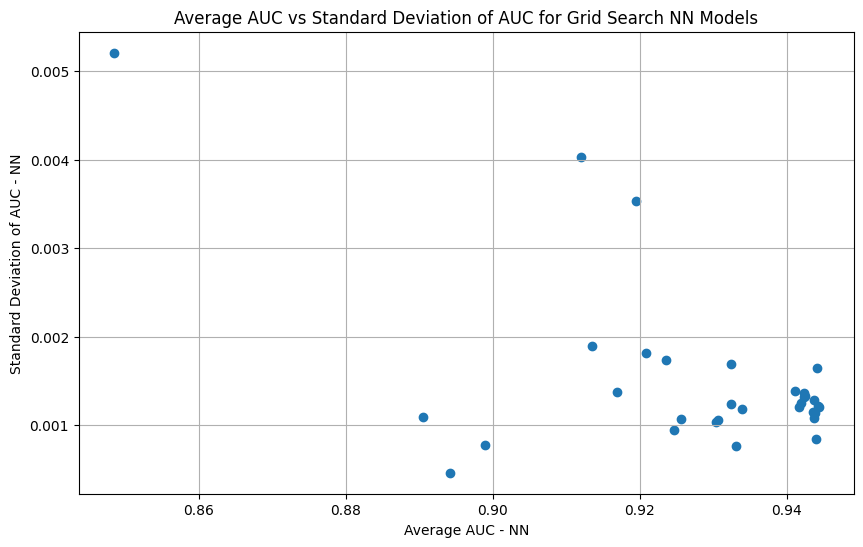

In [159]:
# Calculate average and standard deviation of AUCs

import matplotlib.pyplot as plt

Grid_Search_Results_NN['Average AUC'] = Grid_Search_Results_NN[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
Grid_Search_Results_NN['Standard Deviation AUC'] = Grid_Search_Results_NN[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 6))
plt.scatter(Grid_Search_Results_NN['Average AUC'], Grid_Search_Results_NN['Standard Deviation AUC'])
plt.xlabel('Average AUC - NN')
plt.ylabel('Standard Deviation of AUC - NN')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search NN Models')
plt.grid(True)
plt.show()

In [161]:
import shap 
shap.initjs()

/Users/neelkalavadiya/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [169]:
explainer = shap.Explainer(final_XGBoost_model, X_Train)
shap_values = explainer(X_Test1)

 99%|===================| 13609/13767 [00:45<00:00]        

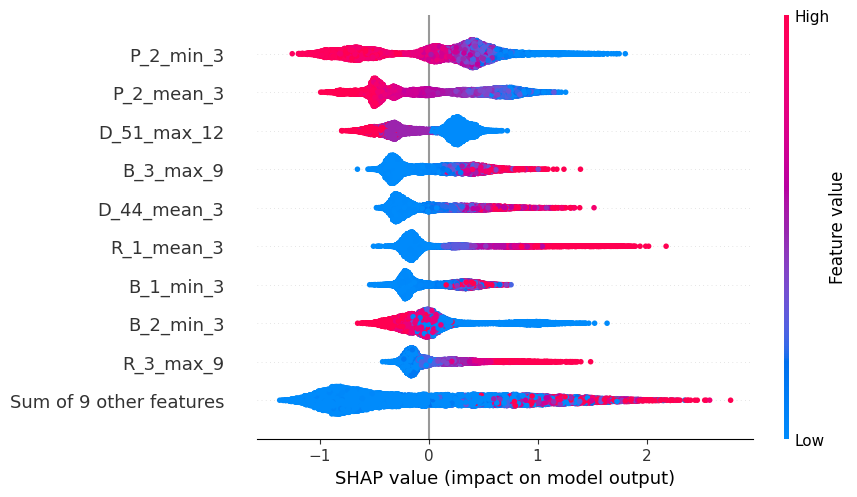

In [170]:
shap.plots.beeswarm(shap_values)

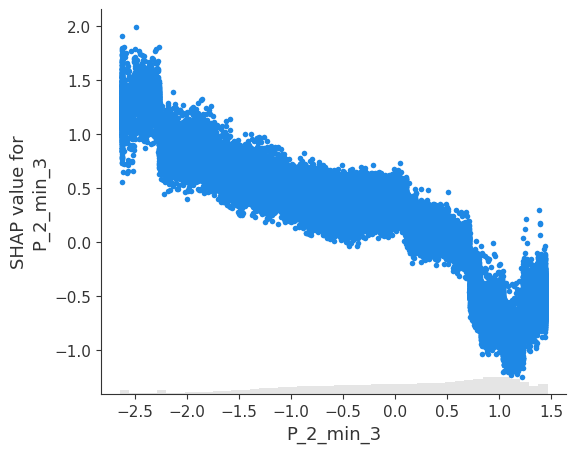

In [199]:
# Create a scatter plot of SHAP values for that specified feature
shap.plots.scatter(shap_values[:,"P_2_min_3"])

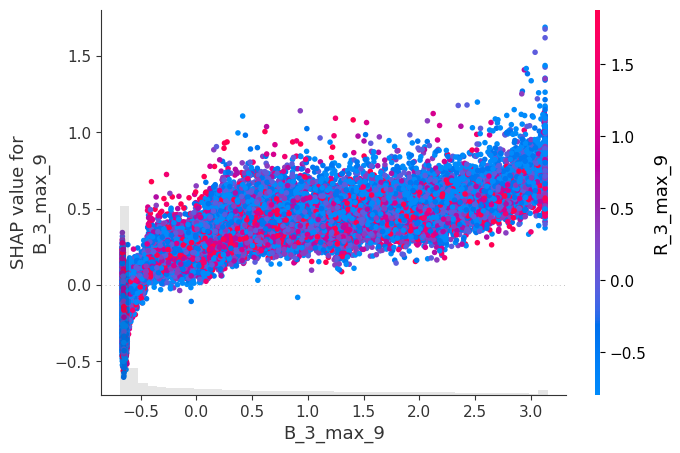

In [198]:
shap.plots.scatter(shap_values[:,"B_3_max_9"], color=shap_values[:,"R_3_max_9"])

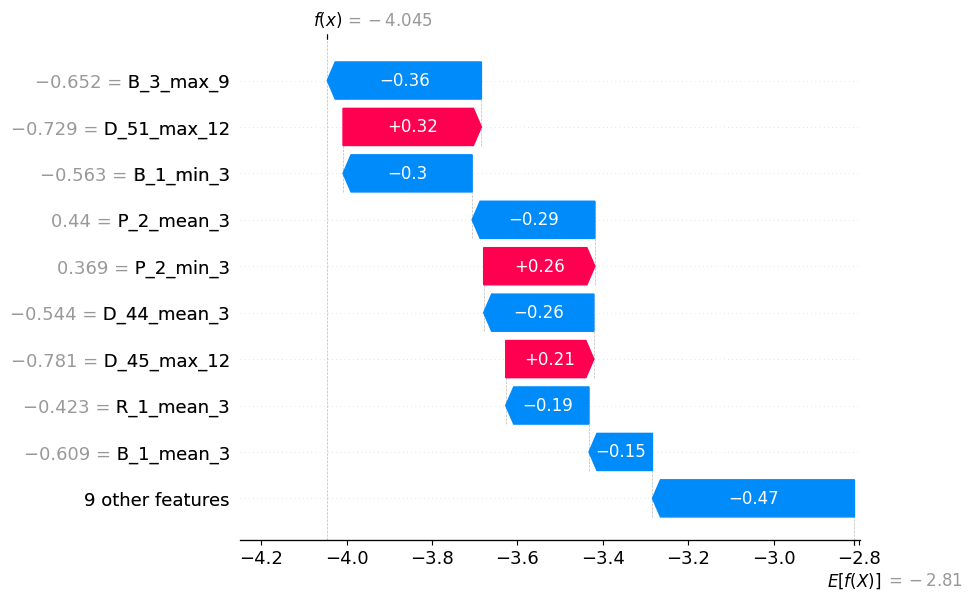

In [202]:
# Plot describes that how the specific row's (1121) individual features data affects the model's prediction
shap.plots.waterfall(shap_values[121])

In [201]:
# This Plot describes that how the specific row's (121) individual features data affects the model's prediction
shap.force_plot(shap_values.base_values[121], shap_values.values[121], X_Test1.iloc[121])

# Strategy

In [150]:
strategyData_Train = pd.read_csv('strategyData_Train.csv', index_col=0)
strategyData_Train["Monthly Revenue"] = (strategyData_Train['B_1_mean_6']*0.02) + (strategyData_Train['S_3_mean_6']*0.001)
strategyData_Train["Total Revenue in next 12 months"] = strategyData_Train["Monthly Revenue"]*12
strategyData_Train

,target,Model's Output,B_1_mean_6,S_3_mean_6,Monthly Revenue,Total Revenue in next 12 months
0,0.0,0.107272,0.046704,0.021220,0.000955,0.011464
1,1.0,0.836879,0.606087,0.180836,0.012303,0.147631
2,0.0,0.013344,0.006068,NaN,NaN,NaN
3,1.0,0.740994,0.570967,0.240351,0.011660,0.139916
4,1.0,0.694366,0.028071,0.318232,0.000880,0.010556
...,...,...,...,...,...,...
64243,1.0,0.067296,0.431134,0.149807,0.008772,0.105270
64244,0.0,0.003531,0.094897,0.166599,0.002065,0.024775
64245,1.0,0.401134,0.049822,0.252993,0.001249,0.014993
64246,0.0,0.302591,0.149262,0.481562,0.003467,0.041602


In [151]:
strategyData_Test1 = pd.read_csv('strategyData_Test1.csv', index_col=0)
strategyData_Test1["Monthly Revenue"] = (strategyData_Test1['B_1_mean_6']*0.02) + (strategyData_Test1['S_3_mean_6']*0.001)
strategyData_Test1["Total Revenue in next 12 months"] = strategyData_Test1["Monthly Revenue"]*12
strategyData_Test1

,target,Model's Output,B_1_mean_6,S_3_mean_6,Monthly Revenue,Total Revenue in next 12 months
0,0.0,0.002745,0.023463,0.104911,0.000574,0.006890
1,0.0,0.219556,0.220314,0.362256,0.004769,0.057222
2,0.0,0.144517,0.182210,0.189101,0.003833,0.046000
3,0.0,0.395797,0.556628,0.260981,0.011394,0.136722
4,0.0,0.308259,0.288392,0.318771,0.006087,0.073039
...,...,...,...,...,...,...
13762,1.0,0.897425,0.155834,0.342578,0.003459,0.041511
13763,0.0,0.018184,0.004640,NaN,NaN,NaN
13764,1.0,0.917013,0.054466,1.220555,0.002310,0.027719
13765,0.0,0.002328,0.037464,0.150519,0.000900,0.010798


In [152]:
strategyData_Test2 = pd.read_csv('strategyData_Test2.csv', index_col=0)
strategyData_Test2["Monthly Revenue"] = (strategyData_Test2['B_1_mean_6']*0.02) + (strategyData_Test2['S_3_mean_6']*0.001)
strategyData_Test2["Total Revenue in next 12 months"] = strategyData_Test2["Monthly Revenue"]*12
strategyData_Test2

,target,Model's Output,B_1_mean_6,S_3_mean_6,Monthly Revenue,Total Revenue in next 12 months
0,0.0,0.025180,0.037613,0.114837,0.000867,0.010405
1,0.0,0.310721,0.037991,0.473995,0.001234,0.014806
2,1.0,0.974102,1.093968,0.243515,0.022123,0.265475
3,0.0,0.002459,0.029676,0.176335,0.000770,0.009238
4,0.0,0.683936,0.283971,0.163897,0.005843,0.070120
...,...,...,...,...,...,...
13763,0.0,0.001119,0.008079,0.131650,0.000293,0.003519
13764,0.0,0.065255,0.023419,0.090496,0.000559,0.006706
13765,0.0,0.001651,0.003415,NaN,NaN,NaN
13766,0.0,0.251380,0.099953,0.174182,0.002173,0.026079


In [156]:
def calculate_portfolio_metrics(data, target_var, model_output, monthly_balance, monthly_spend, threshold):

    # Determine accepted loans based on the threshold
    accepted = data[data[model_output] < threshold]

    # Calculate default rate and total annual revenue for the portfolio
    default_rate = accepted[target_var].mean()
    portfolio_revenue = accepted['Total Revenue in next 12 months'].sum()

    return default_rate, portfolio_revenue

In [159]:
thresholds = np.linspace(0, 1, 101)

# Initialize best metrics
best_conservative_metrics = (0, 0)
best_aggressive_metrics = (0, 0)
conservative_threshold = 0
aggressive_threshold = 0

for i in thresholds:
    default_rate, portfolio_revenue = calculate_portfolio_metrics(strategyData_Train, "target", "Model's Output", "B_1_mean_6", "S_3_mean_6", i)

    # Update best conservative metrics
    if default_rate <= 0.05 and portfolio_revenue > best_conservative_metrics[1]:
        best_conservative_metrics = (default_rate, portfolio_revenue)
        conservative_threshold = i
 
    # Update best aggressive metrics
    if default_rate <= 0.10 and portfolio_revenue > best_aggressive_metrics[1]:
        best_aggressive_metrics = (default_rate, portfolio_revenue)
        aggressive_threshold = i
 
# Print the best thresholds and their metrics
print(f"Conservative strategy (threshold = {conservative_threshold}): Default rate = {best_conservative_metrics[0]}, Portfolio's Revenue = {best_conservative_metrics[1]}")
print(f"Aggressive strategy (threshold = {aggressive_threshold}): Default rate = {best_aggressive_metrics[0]}, Portfolio's Revenue = {best_aggressive_metrics[1]}")

Conservative strategy (threshold = 0.39): Default rate = 0.049903434190956115, Portfolio's Revenue = 711.6954908528525
Aggressive strategy (threshold = 0.61): Default rate = 0.09941184624829198, Portfolio's Revenue = 1048.402922903532


In [162]:
conservative_metrics = calculate_portfolio_metrics(strategyData_Test1, "target", "Model's Output", "B_1_mean_6", "S_3_mean_6", 0.39)
aggressive_metrics = calculate_portfolio_metrics(strategyData_Test1, "target", "Model's Output", "B_1_mean_6", "S_3_mean_6", 0.61)

print(f"Conservative strategy (threshold = 0.39): Default rate = {conservative_metrics[0]}, Portfolio's Revenue = {conservative_metrics[1]}")
print(f"Aggressive strategy (threshold = 0.61): Default rate = {aggressive_metrics[0]}, Portfolio's Revenue = {aggressive_metrics[1]}")

Conservative strategy (threshold = 0.39): Default rate = 0.06030621810228101, Portfolio's Revenue = 148.33396876756768
Aggressive strategy (threshold = 0.61): Default rate = 0.10912459471977767, Portfolio's Revenue = 219.72422520167197


In [163]:
conservative_metrics = calculate_portfolio_metrics(strategyData_Test2, "target", "Model's Output", "B_1_mean_6", "S_3_mean_6", 0.39)
aggressive_metrics = calculate_portfolio_metrics(strategyData_Test2, "target", "Model's Output", "B_1_mean_6", "S_3_mean_6", 0.61)

print(f"Conservative strategy (threshold = 0.39): Default rate = {conservative_metrics[0]}, Portfolio's Revenue = {conservative_metrics[1]}")
print(f"Aggressive strategy (threshold = 0.61): Default rate = {aggressive_metrics[0]}, Portfolio's Revenue = {aggressive_metrics[1]}")

Conservative strategy (threshold = 0.39): Default rate = 0.053911423841059604, Portfolio's Revenue = 153.0460729247394
Aggressive strategy (threshold = 0.61): Default rate = 0.10090640029596744, Portfolio's Revenue = 225.02520039693374
